What is boosting in Machine Learning?
ANS. Boosting is an ensemble learning technique that builds strong learners by combining multiple weak learners (typically decision trees). It works iteratively, where each subsequent model focuses on correcting the errors of the previous models. This sequential learning aims to reduce bias and variance, leading to improved model accuracy.




How does Boosting differ from Bagging?
ANS. Boosting: Models are trained sequentially, with each new model improving upon the mistakes of the previous ones. It reduces bias.
Bagging: Models are trained independently in parallel, and the final prediction is a majority vote or average. Bagging reduces variance.




What is the key idea behind AdaBoost?
AdaBoost (Adaptive Boosting) assigns weights to training samples. Misclassified samples get higher weights, ensuring that subsequent models focus more on these hard-to-classify instances. It combines weak classifiers to form a strong classifier.





Explain the working of AdaBoost with an example.
ANS. Suppose we classify whether a fruit is an apple or not.
First, a weak learner (e.g., a decision stump) is trained and predicts outputs. Misclassified fruits (e.g., mislabeled apples) are assigned higher weights.

The next weak learner focuses more on these misclassified examples.

This process is repeated, and all weak learners' predictions are combined (e.g., via weighted voting). Final prediction aggregates results, giving higher priority to learners with lower error rates.




What is Gradient Boosting, and how is it different from AdaBoost?
ANS. Gradient Boosting optimizes a loss function by training models iteratively on the residual errors of previous models. It leverages gradient descent to minimize the error, making it more flexible than AdaBoost.

AdaBoost: Focuses on weighting misclassified samples.
Gradient Boosting: Focuses on minimizing residuals directly.



What is the loss function in Gradient Boosting?
ANS. The loss function depends on the problem:
Regression: Mean Squared Error (MSE) or Mean Absolute Error (MAE).
Classification: Log Loss (Cross-Entropy).



How does XGBoost improve over traditional Gradient Boosting?
ANS. Regularization (L1 and L2) to avoid overfitting.
Parallel processing for faster computation.
Optimized handling of missing values.
Advanced tree pruning using a "max depth" approach.
Distributed computing for large-scale data.



What is the difference between XGBoost and CatBoost?
ANS. XGBoost: Efficient for numerical and categorical data with preprocessing.
CatBoost: Specializes in categorical data, handling it natively without extensive preprocessing. It uses unique techniques like Ordered Boosting to avoid overfitting.




What are some real-world applications of Boosting techniques?
ANS. Fraud detection in banking.
Disease diagnosis in healthcare.
Recommendation systems in e-commerce.
Sentiment analysis in social media.
Predicting customer churn in telecom.



How does regularization help in XGBoost?
ANS.Regularization (L1 and L2 penalties) prevents overfitting by penalizing overly complex models, ensuring the model generalizes well to unseen data.




What are some hyperparameters to tune in Gradient Boosting models?
ANS. Learning rate: Controls the contribution of each weak learner.
Number of estimators: Number of trees to build.
Max depth: Depth of each tree.
Subsample: Fraction of data used for training each tree.
Regularization parameters: L1 and L2 penalties.




What is the concept of feature Importance in Boosting? 
ANS. Feature importance indicates the contribution of each feature in building the model. Features with higher importance values have a significant impact on predictions. It helps with feature selection and understanding model behavior.



Why is CatBoost efficient for categorical data?
ANS. CatBoost handles categorical data natively using techniques like encoding categories via Ordered Target Statistics. This reduces preprocessing needs and prevents data leakage. Its Ordered Boosting algorithm improves generalization by avoiding overfitting.

# Practical----

In [1]:
# Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

ad_clf=AdaBoostClassifier()

data=load_breast_cancer()

X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

ad_clf.fit(X_train,y_train)
y_pred=ad_clf.predict(X_test)
accuracy_score(y_test,y_pred)

(398, 30) (171, 30) (398,) (171,)


0.9766081871345029

In [2]:
# Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

# Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

ad_reg=AdaBoostRegressor()

data=load_diabetes()

X,y=data.data,data.target
X
y

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

ad_reg.fit(X_train,y_train)
y_pred=ad_reg.predict(X_test)
mean_absolute_error(y_test,y_pred)

(309, 10) (133, 10) (309,) (133,)


43.800704246897

In [3]:
# Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

gr_clf=GradientBoostingClassifier()

data=load_breast_cancer()

X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

gr_clf.fit(X_train,y_train)
y_pred=gr_clf.predict(X_test)
accuracy_score(y_test,y_pred)

feature_names=data.feature_names
feature_importance=gr_clf.feature_importances_

df=pd.DataFrame({"features":feature_names,
                 "importance":feature_importance})
df=df.sort_values(by="importance")
df

(398, 30) (171, 30) (398,) (171,)


,features,importance
4,mean smoothness,0.000025
2,mean perimeter,0.000061
0,mean radius,0.000068
9,mean fractal dimension,0.000073
14,smoothness error,0.000110
25,worst compactness,0.000278
12,perimeter error,0.000381
28,worst symmetry,0.000515
19,fractal dimension error,0.000728
13,area error,0.001008


In [4]:
#Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import warnings


warnings.filterwarnings("ignore")

gr_reg=GradientBoostingRegressor()

data=load_diabetes()

X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

gr_reg.fit(X_train,y_train)
y_pred=gr_reg.predict(X_test)
mean_absolute_error(y_test,y_pred)

(309, 10) (133, 10) (309,) (133,)


44.556033689090384

In [5]:
# Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

gr_clf=XGBClassifier()

data=load_breast_cancer()

X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

gr_clf.fit(X_train,y_train)
y_pred=gr_clf.predict(X_test)
accuracy_score(y_test,y_pred)



(398, 30) (171, 30) (398,) (171,)


0.9707602339181286

In [7]:
# Train a CatBoost Classifier and evaluate using F1-Score


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

gr_clf=CatBoostClassifier()

data=load_breast_cancer()

X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

gr_clf.fit(X_train,y_train)
y_pred=gr_clf.predict(X_test)
accuracy_score(y_test,y_pred)



(398, 30) (171, 30) (398,) (171,)
Learning rate set to 0.006952
0:	learn: 0.6829454	total: 156ms	remaining: 2m 35s
1:	learn: 0.6734569	total: 168ms	remaining: 1m 24s
2:	learn: 0.6624879	total: 175ms	remaining: 58s
3:	learn: 0.6532119	total: 180ms	remaining: 44.9s
4:	learn: 0.6425674	total: 186ms	remaining: 37s
5:	learn: 0.6333513	total: 195ms	remaining: 32.3s
6:	learn: 0.6229367	total: 201ms	remaining: 28.5s
7:	learn: 0.6151483	total: 206ms	remaining: 25.5s
8:	learn: 0.6035956	total: 214ms	remaining: 23.6s
9:	learn: 0.5942995	total: 221ms	remaining: 21.9s
10:	learn: 0.5853846	total: 226ms	remaining: 20.3s
11:	learn: 0.5768328	total: 230ms	remaining: 19s
12:	learn: 0.5688427	total: 235ms	remaining: 17.9s
13:	learn: 0.5604361	total: 242ms	remaining: 17.1s
14:	learn: 0.5526534	total: 250ms	remaining: 16.4s
15:	learn: 0.5447264	total: 254ms	remaining: 15.6s
16:	learn: 0.5380921	total: 258ms	remaining: 14.9s
17:	learn: 0.5302855	total: 262ms	remaining: 14.3s
18:	learn: 0.5240118	total: 268m

0.9766081871345029

In [13]:
# Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings


warnings.filterwarnings("ignore")

gr_reg=XGBRegressor()

data=load_diabetes()

X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

gr_reg.fit(X_train,y_train)
y_pred=gr_reg.predict(X_test)
print(f" the mse value: {mean_squared_error(y_test,y_pred)}")
print(f" the MAE value: {mean_absolute_error(y_test,y_pred)}")

(309, 10) (133, 10) (309,) (133,)
 the mse value: 3513.659206003472
 the MAE value: 46.2805387167106


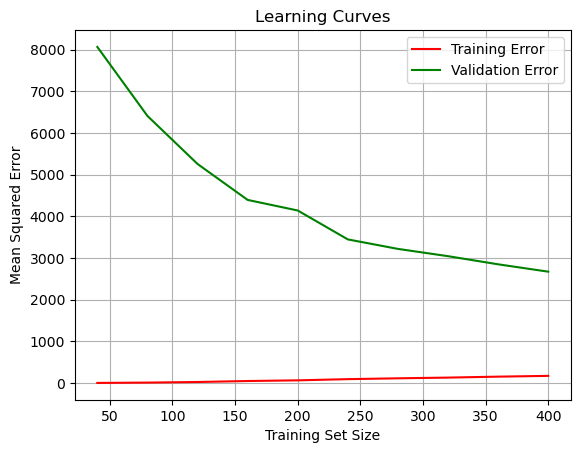

In [14]:
#22.Train a Gradient Boosting Regressor and plot learning curves


import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=10, noise=0.1, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="neg_mean_squared_error"
)

# Calculate mean and plot
train_mean = -np.mean(train_scores, axis=1)  # Convert to MSE
test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Error", color="red")
plt.plot(train_sizes, test_mean, label="Validation Error", color="green")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.legend()
plt.grid()
plt.show()


In [2]:
# 23 Train an XGBoost Classifier and visualize feature importance

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

gr_clf=XGBClassifier()

data=load_breast_cancer()

X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

gr_clf.fit(X_train,y_train)
y_pred=gr_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

feature_names=data.feature_names
feature_importance=gr_clf.feature_importances_

df=pd.DataFrame({"features":feature_names,
                 "importance":feature_importance})
df=df.sort_values(by="importance")
df

(398, 30) (171, 30) (398,) (171,)
0.9707602339181286


,features,importance
0,mean radius,0.000000
2,mean perimeter,0.000000
25,worst compactness,0.000442
17,concave points error,0.000747
3,mean area,0.000991
18,symmetry error,0.001060
6,mean concavity,0.001910
4,mean smoothness,0.002205
9,mean fractal dimension,0.002247
28,worst symmetry,0.003047


In [4]:
#24. Train a CatBoost Classifier and plot the confusion matrix

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

gr_clf=CatBoostClassifier()

data=load_breast_cancer()

X,y=data.data,data.target
X
y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

gr_clf.fit(X_train,y_train)
y_pred=gr_clf.predict(X_test)
print(f" the confusion matrix values {confusion_matrix(y_test,y_pred)}")

(398, 30) (171, 30) (398,) (171,)
Learning rate set to 0.006952
0:	learn: 0.6829454	total: 9.86ms	remaining: 9.85s
1:	learn: 0.6734569	total: 16.2ms	remaining: 8.08s
2:	learn: 0.6624879	total: 23.3ms	remaining: 7.73s
3:	learn: 0.6532119	total: 30.5ms	remaining: 7.59s
4:	learn: 0.6425674	total: 40.1ms	remaining: 7.97s
5:	learn: 0.6333513	total: 45.7ms	remaining: 7.57s
6:	learn: 0.6229367	total: 52.4ms	remaining: 7.43s
7:	learn: 0.6151483	total: 57.5ms	remaining: 7.13s
8:	learn: 0.6035956	total: 63.4ms	remaining: 6.98s
9:	learn: 0.5942995	total: 67.3ms	remaining: 6.67s
10:	learn: 0.5853846	total: 71.6ms	remaining: 6.44s
11:	learn: 0.5768328	total: 75.5ms	remaining: 6.21s
12:	learn: 0.5688427	total: 80.4ms	remaining: 6.1s
13:	learn: 0.5604361	total: 84.9ms	remaining: 5.98s
14:	learn: 0.5526534	total: 88.8ms	remaining: 5.83s
15:	learn: 0.5447264	total: 93.7ms	remaining: 5.76s
16:	learn: 0.5380921	total: 99.2ms	remaining: 5.74s
17:	learn: 0.5302855	total: 104ms	remaining: 5.66s
18:	learn: 0

In [15]:
# 25  Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


base_estimators = [DecisionTreeClassifier(max_depth=1), LogisticRegression(max_iter=500)]
n_estimators_list = [10, 50, 100, 150, 200]


results = {}

for base_estimator in base_estimators:
    accuracies = []
    for n_estimators in n_estimators_list:
        
        ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators, random_state=42)
        
      
        ada.fit(X_train, y_train)
        
    
        y_pred = ada.predict(X_test)
        
     
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
   
    results[base_estimator] = accuracies

print(results)


{DecisionTreeClassifier(max_depth=1): [0.78, 0.8466666666666667, 0.85, 0.8266666666666667, 0.8333333333333334], LogisticRegression(max_iter=500): [0.8166666666666667, 0.8166666666666667, 0.8166666666666667, 0.8166666666666667, 0.8166666666666667]}


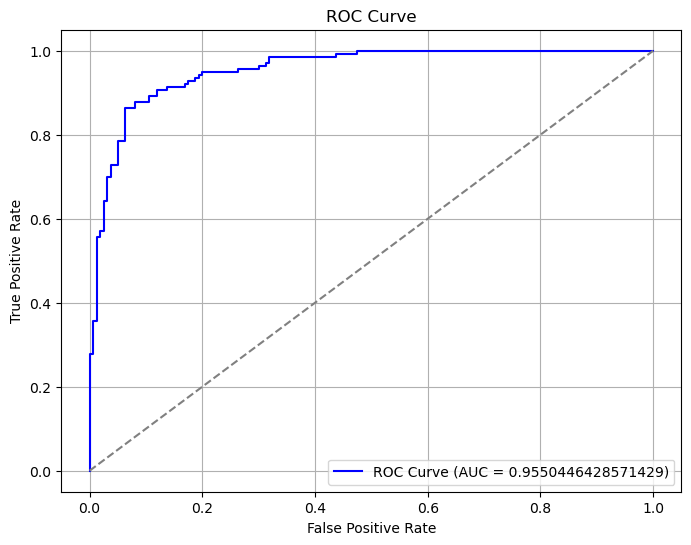

In [22]:
# 26. Train a Gradient Boosting Classifier and visualize the ROC curve

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = gb.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [30]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np


X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    weights=[0.9, 0.1], random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_no_weight = CatBoostClassifier(verbose=0, random_seed=42)
model_no_weight.fit(X_train, y_train)


y_pred_no_weight = model_no_weight.predict(X_test)
auc_no_weight = roc_auc_score(y_test, model_no_weight.predict_proba(X_test)[:, 1])
print("Without Class Weights:")
print(classification_report(y_test, y_pred_no_weight))
print(f"AUC: {auc_no_weight:.2f}")


class_weights = {0: 1, 1: np.sum(y == 0) / np.sum(y == 1)}  # Calculate class weights
model_with_weight = CatBoostClassifier(class_weights=class_weights, verbose=0, random_seed=42)
model_with_weight.fit(X_train, y_train)

# Predict and evaluate
y_pred_with_weight = model_with_weight.predict(X_test)
auc_with_weight = roc_auc_score(y_test, model_with_weight.predict_proba(X_test)[:, 1])
print("\nWith Class Weights:")
print(classification_report(y_test, y_pred_with_weight))
print(f"AUC: {auc_with_weight:.2f}")


Without Class Weights:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       274
           1       1.00      0.35      0.51        26

    accuracy                           0.94       300
   macro avg       0.97      0.67      0.74       300
weighted avg       0.95      0.94      0.93       300

Auccuracy: 0.94

With Class Weights:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       274
           1       1.00      0.27      0.42        26

    accuracy                           0.94       300
   macro avg       0.97      0.63      0.70       300
weighted avg       0.94      0.94      0.92       300

Auccuracy: 0.94


In [ ]:
#30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.


